In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set(style='whitegrid', context='talk', palette='rainbow')
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.style.use('dark_background')

Yüklənən csv faylları haqqında məlumat
| Variable adı  | CSV faylının adı| Açıqlaması|
|:------------:|:---------------:|:---------:|
|valueof_prod | Azerbaijan_Value_of_Agricultural_Production.csv | |
| inflation_rate | inflation_azerbaijan.csv |İnflyasiyanın dərəcəsi (1992-2024 intervalında)  |

In [2]:
valueof_prod = pd.read_csv("./data/Azerbaijan_Value_of_Agricultural_Production.csv")
inflation_rate = pd.read_csv("./data/inflation_azerbaijan.csv")
display(valueof_prod)
display(inflation_rate)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1994,1994,1000 Int$,1031,E,Estimated value
1,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1995,1995,1000 Int$,1031,E,Estimated value
2,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1996,1996,1000 Int$,1021,E,Estimated value
3,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1997,1997,1000 Int$,976,E,Estimated value
4,QV,Value of Agricultural Production,31,Azerbaijan,152,Gross Production Value (constant 2014-2016 tho...,01371,"Almonds, in shell",1998,1998,1000 Int$,1244,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9440,QV,Value of Agricultural Production,31,Azerbaijan,58,Gross Production Value (constant 2014-2016 tho...,0111,Wheat,2018,2018,1000 USD,534109,E,Estimated value
9441,QV,Value of Agricultural Production,31,Azerbaijan,58,Gross Production Value (constant 2014-2016 tho...,0111,Wheat,2019,2019,1000 USD,566948,E,Estimated value
9442,QV,Value of Agricultural Production,31,Azerbaijan,58,Gross Production Value (constant 2014-2016 tho...,0111,Wheat,2020,2020,1000 USD,487711,E,Estimated value
9443,QV,Value of Agricultural Production,31,Azerbaijan,58,Gross Production Value (constant 2014-2016 tho...,0111,Wheat,2021,2021,1000 USD,492678,E,Estimated value


,Year,Inflation Rate (%),Annual Change
0,2022,13.85%,7.20%
1,2021,6.65%,3.89%
2,2020,2.76%,0.15%
3,2019,2.61%,0.34%
4,2018,2.27%,-10.67%
...,...,...,...
58,1964,0.00%,0.00%
59,1963,0.00%,0.00%
60,1962,0.00%,0.00%
61,1961,0.00%,0.00%


In [6]:
print(valueof_prod.dtypes)
print(inflation_rate.dtypes)
print(valueof_prod.isnull().sum())
print(inflation_rate.isnull().sum())

Domain Code         object
Domain              object
Area Code (M49)      int64
Area                object
Element Code         int64
Element             object
Item Code (CPC)     object
Item                object
Year Code            int64
Year                 int64
Unit                object
Value                int64
Flag                object
Flag Description    object
dtype: object
Year                   int64
Inflation Rate (%)    object
Annual Change         object
dtype: object
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64
Year                  0
Inflation Rate (%)    0
Annual Change         0
dtype: int64


Analiz zamanı lazım olmayan sütunları çıxaraq:

In [8]:
valueof_prod = valueof_prod[["Element","Item","Year","Value","Unit","Flag Description"]]
valueof_prod = valueof_prod[valueof_prod["Element"]== "Gross Production Value (current thousand SLC)"]
inflation_rate = inflation_rate[~(inflation_rate["Inflation Rate (%)"] == "0.00%")]
display(valueof_prod)
display(inflation_rate)



,Element,Item,Year,Value,Unit,Flag Description
29,Gross Production Value (current thousand SLC),"Almonds, in shell",2004,427,1000 SLC,Estimated value
30,Gross Production Value (current thousand SLC),"Almonds, in shell",2005,504,1000 SLC,Estimated value
31,Gross Production Value (current thousand SLC),"Almonds, in shell",2006,1054,1000 SLC,Estimated value
32,Gross Production Value (current thousand SLC),"Almonds, in shell",2007,602,1000 SLC,Estimated value
33,Gross Production Value (current thousand SLC),"Almonds, in shell",2008,1000,1000 SLC,Estimated value
...,...,...,...,...,...,...
9353,Gross Production Value (current thousand SLC),Wheat,2018,517838,1000 SLC,Estimated value
9354,Gross Production Value (current thousand SLC),Wheat,2019,570817,1000 SLC,Estimated value
9355,Gross Production Value (current thousand SLC),Wheat,2020,491039,1000 SLC,Estimated value
9356,Gross Production Value (current thousand SLC),Wheat,2021,569528,1000 SLC,Estimated value


,Year,Inflation Rate (%),Annual Change
0,2022,13.85%,7.20%
1,2021,6.65%,3.89%
2,2020,2.76%,0.15%
3,2019,2.61%,0.34%
4,2018,2.27%,-10.67%
5,2017,12.94%,0.49%
6,2016,12.44%,8.42%
7,2015,4.03%,2.65%
8,2014,1.37%,-1.04%
9,2013,2.42%,1.35%


Adjusted GVP\(_{2020}\) = GVP\(_{2020}\) \(\times\) (1 + inflation rate\(_{2020}\))


In [9]:
valueof_prod = pd.DataFrame(valueof_prod[["Year","Value"]].groupby("Year")["Value"].sum())

valueof_prod

,Value
Year,
1994,61497
1995,359687
1996,471127
1997,424047
1998,486047
1999,556477
2000,673052
2001,746952
2002,846586


In [11]:
valueof_prod = valueof_prod.merge(inflation_rate,how = "inner",on = "Year")
valueof_prod

,Year,Value,Inflation Rate (%),Annual Change
0,1994,61497,"1,662.22%",534.22%
1,1995,359687,411.76%,-1250.46%
2,1996,471127,19.79%,-391.96%
3,1997,424047,3.67%,-16.12%
4,1998,486047,-0.77%,-4.45%
5,1999,556477,-8.53%,-7.75%
6,2000,673052,1.81%,10.33%
7,2001,746952,1.55%,-0.26%
8,2002,846586,2.77%,1.22%
9,2003,1031528,2.23%,-0.54%


Str funksiyasıyla bütün sütunlardan % işarəsini qaldırırıq

In [19]:
valueof_prod["Inflation Rate (%)"] = valueof_prod["Inflation Rate (%)"].str[:-1]
valueof_prod

,Year,Value,Inflation Rate (%),Annual Change
0,1994,61497,"1,662.2",534.22%
1,1995,359687,411.7,-1250.46%
2,1996,471127,19.7,-391.96%
3,1997,424047,3.6,-16.12%
4,1998,486047,-0.7,-4.45%
5,1999,556477,-8.5,-7.75%
6,2000,673052,1.8,10.33%
7,2001,746952,1.5,-0.26%
8,2002,846586,2.7,1.22%
9,2003,1031528,2.2,-0.54%


1,662.2 dəyəri xəta verirdi digər dəyərlər kimi float tipinə keçirdim və vergülləri qaldırdım.

In [27]:
valueof_prod['Inflation Rate (%)'] = (valueof_prod["Inflation Rate (%)"].apply(lambda x: x.replace(',',''))).astype("float64")

In [28]:
valueof_prod

,Year,Value,Inflation Rate (%),Annual Change
0,1994,61497,1662.2,534.22%
1,1995,359687,411.7,-1250.46%
2,1996,471127,19.7,-391.96%
3,1997,424047,3.6,-16.12%
4,1998,486047,-0.7,-4.45%
5,1999,556477,-8.5,-7.75%
6,2000,673052,1.8,10.33%
7,2001,746952,1.5,-0.26%
8,2002,846586,2.7,1.22%
9,2003,1031528,2.2,-0.54%


In [30]:
valueof_prod["impact_inflation_value"] = valueof_prod["Value"] *(1 + valueof_prod["Inflation Rate (%)"])
valueof_prod

,Year,Value,Inflation Rate (%),Annual Change,impact_inflation_value
0,1994,61497,1662.2,534.22%,102281810.4
1,1995,359687,411.7,-1250.46%,148442824.9
2,1996,471127,19.7,-391.96%,9752328.9
3,1997,424047,3.6,-16.12%,1950616.2
4,1998,486047,-0.7,-4.45%,145814.1
5,1999,556477,-8.5,-7.75%,-4173577.5
6,2000,673052,1.8,10.33%,1884545.6
7,2001,746952,1.5,-0.26%,1867380.0
8,2002,846586,2.7,1.22%,3132368.2
9,2003,1031528,2.2,-0.54%,3300889.6


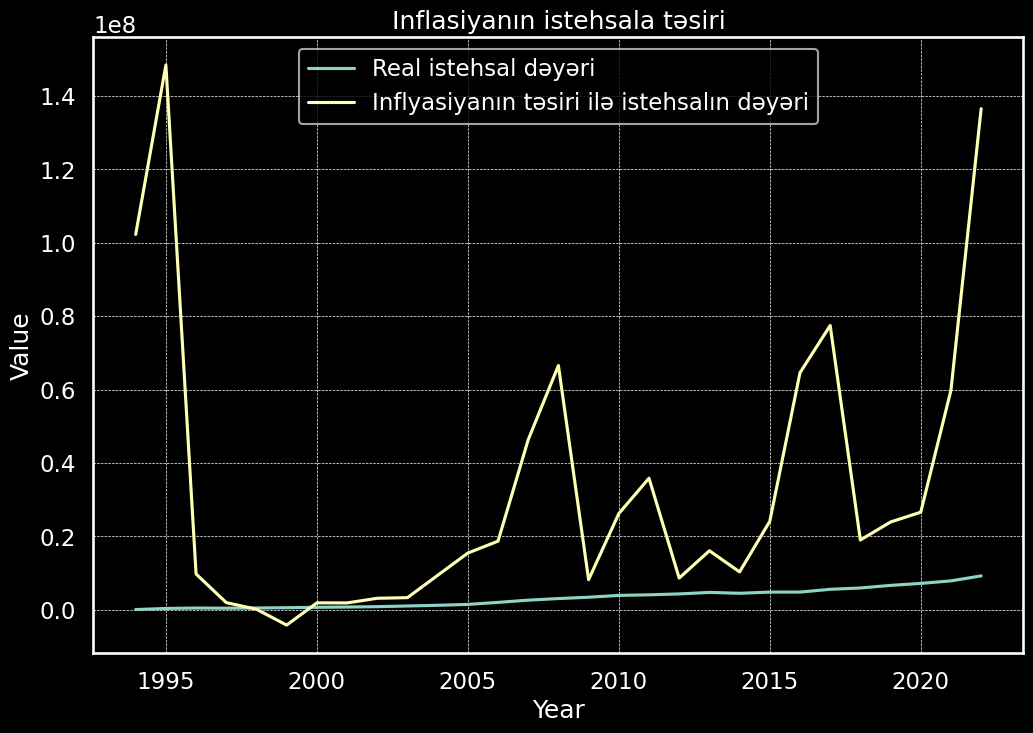

In [32]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=valueof_prod,x = "Year",y = "Value",label = "Real istehsal dəyəri")
sns.lineplot(data = valueof_prod,x = 'Year',y = "impact_inflation_value",label = "Inflyasiyanın təsiri ilə istehsalın dəyəri")
plt.title("Inflasiyanın istehsala təsiri")
plt.show()